# What is the most desirable technology stack in 2020?


### Business Understanding

If you are a seasoned software developer or a newbee who just want to be a software developer, you may want to know answers to the questions like: 
What are the most preferred programming language to learn in 2020?
What are the most preferred database to learn in 2020?
What are the most preferred Web Framework to learn in 2020?
What are the most preferred other miscellenous technologies to learn in 2020?

To answer these questions, I used data from Stackoverflow's 2019 Annual Developer Survey. The survey data covers 88,863 reviews from 213 countries and territories. The survey aims to understand multiple aspects of jobs related to software development and data analytics.
 

### Data Understanding

To get started, let's read in the necessary libraries we will need to wrangle our data: pandas and numpy. If we decided to build some basic plots, matplotlib might prove useful as well.

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline
from collections import defaultdict
import matplotlib.pyplot as plt

df = pd.read_csv('./survey_results_public_2019.csv')
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


Let's focus on our first question: 
What are the most preferred programming language to learn in 2020? To answer this question we will review the field 
LanguageDesireNextYear in the dataframe. Let's look into the column more closely.

In [24]:
len(df.Country.unique())

180

In [25]:
df.LanguageDesireNextYear.value_counts()

Python                                                                                                                               1236
HTML/CSS;JavaScript                                                                                                                   697
HTML/CSS;JavaScript;TypeScript                                                                                                        648
C#                                                                                                                                    607
Java                                                                                                                                  584
C#;HTML/CSS;JavaScript;SQL                                                                                                            572
C#;HTML/CSS;JavaScript;SQL;TypeScript                                                                                                 568
HTML/CSS;JavaScript;PHP;SQL       

In [26]:
# This isn't what I was expecting, it is grouping programming languages together 
# So one row has more than just one answer.  I write a function to clean it up. 
# Following function will create a dictionary with all programming languages and counts. 
# We can use the dictionary to get TOP languages and also do some data visualizations. 

def create_dict_from_col(schema, column):
    '''
    INPUT 
        schema - a dataframe schema name
        column - column name with ';' seperator     
    OUTPUT
        desired_lang_dict - a dictionary with list of category names and their counts
    '''
    df_new = schema[schema[column].notnull()] # Remove NaN records
    desired_lang_dict = {} # Initialize the dict
    # Populate the dict
    for row in df_new[column].to_list():
        languages = row.split(';')
        for each_lang in languages:
            if each_lang in desired_lang_dict:
                desired_lang_dict[each_lang] += 1
            else:
                desired_lang_dict[each_lang] = 1
    return desired_lang_dict

In [27]:
# This is a short utility function we can use to get TOP N categories 
def get_dict_topvals(dict, top_n,is_reverse):
    return sorted(dict.items(), key=lambda x: x[1], reverse = is_reverse)[:top_n] 

In [28]:
# This utility function will create a bar plot for data visualization
def plot_bar_from_dict(dictname,tot_count, title):
    '''
    INPUT 
        dictname - a dictionary
        tot_count - total count of all records required to calculate percetage 
        title - title of the bar chart
    OUTPUT
        bar chart
    '''
    my_series = pd.Series(dictname) 
    (my_series/tot_count).plot(kind="bar")
    plt.title(title);
    

###  1. Identify the top 5 most desired Programming Languages for the coming year

Using above functions we can easily answer all top N categories. Let's apply this to find the most desirable programming languages.

In [29]:
pref_lang_2020 = create_dict_from_col(df,'LanguageDesireNextYear')  
top_5_lang = get_dict_topvals(pref_lang_2020,10,True)
top_5_lang    

[('JavaScript', 44739),
 ('Python', 40006),
 ('HTML/CSS', 36645),
 ('SQL', 33566),
 ('TypeScript', 23720),
 ('Java', 23508),
 ('C#', 22449),
 ('Bash/Shell/PowerShell', 21303),
 ('Go', 17060),
 ('C++', 16856)]

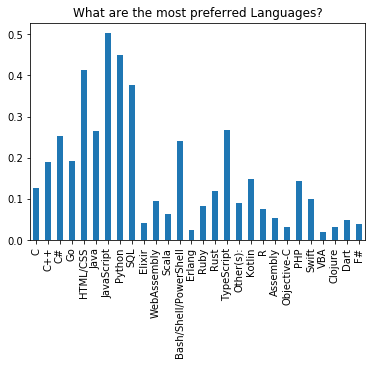

In [30]:
plot_bar_from_dict(pref_lang_2020,df.shape[0],"What are the most preferred Languages?")

### 2. Identify the most desired Database Technology for the coming year.

Now find the top database environments desired by the survey responders.

In [16]:
pref_db_2020 = create_dict_from_col(df,'DatabaseDesireNextYear') 
top_5_db = get_dict_topvals(pref_db_2020,5,True)
top_5_db

[('PostgreSQL', 26446),
 ('MySQL', 25750),
 ('MongoDB', 23667),
 ('Redis', 17913),
 ('SQLite', 17807)]

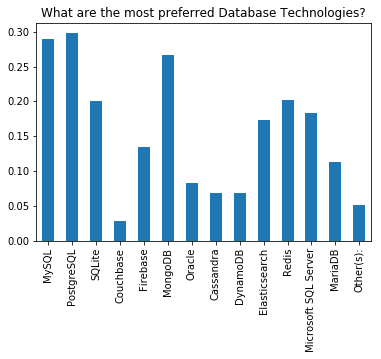

In [17]:
plot_bar_from_dict(pref_db_2020,df.shape[0],"What are the most preferred Database Technologies?")

### 3. Identify the most desired Web Framework for the coming year.

Now find the top Web Frameworks desired by the survey responders.

In [18]:
pref_web_2020 = create_dict_from_col(df,'WebFrameDesireNextYear') 
top_5_web = get_dict_topvals(pref_web_2020,5,True)
top_5_web

[('React.js', 29531),
 ('Vue.js', 19784),
 ('Angular/Angular.js', 19622),
 ('jQuery', 16918),
 ('ASP.NET', 13495)]

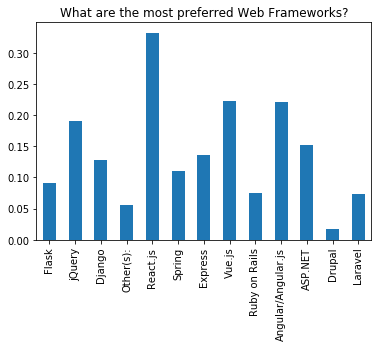

In [19]:
plot_bar_from_dict(pref_web_2020,df.shape[0],"What are the most preferred Web Frameworks?")

### 4. Identify the most desired tools/libraries/technology for the coming year.

Now find the top tools/libraries/technology desired by the survey responders.

In [20]:
pref_misctech_2020 = create_dict_from_col(df,'MiscTechDesireNextYear') 
top_5_misctech = get_dict_topvals(pref_misctech_2020,5,True)
top_5_misctech

[('Node.js', 31417),
 ('TensorFlow', 17904),
 ('.NET Core', 17077),
 ('.NET', 15833),
 ('React Native', 14601)]

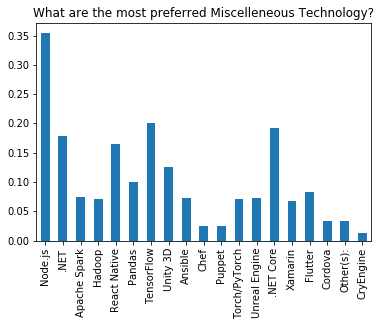

In [21]:
plot_bar_from_dict(pref_misctech_2020,df.shape[0],"What are the most preferred Miscelleneous Technology?")